# Spam Email Classifier using Machine Learning


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset Load

In [2]:
df = pd.read_csv("spam.csv", encoding="latin-1")

In [4]:
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

In [5]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.shape

(5572, 2)

In [7]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

##  Label Encoding

In [25]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['label'] = encoder.fit_transform(df['label'])
# ham = 0, spam = 1

# Text Preprocessing

In [26]:
# Required Libraries

In [27]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

nltk.download('punkt')
nltk.download('stopwords')

ps = PorterStemmer()

[nltk_data] Downloading package punkt to /home/hasnain/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/hasnain/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Text Cleaning and Normalization

In [28]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/hasnain/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [29]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english'):
            y.append(ps.stem(i))

    return " ".join(y)


In [30]:
# apply cleaning

df['transformed_message'] = df['message'].apply(transform_text)
df.head()

,label,message,transformed_message
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


##  Feature Extraction using TF-IDF

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['transformed_message']).toarray()
y = df['label']

##  Train Test Split

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

##  Model Training using Naive Base 

In [33]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


##  Model Evaluation

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.9775784753363229
Precision: 1.0
Recall: 0.8333333333333334
F1 Score: 0.9090909090909091


## Confusion Matrix

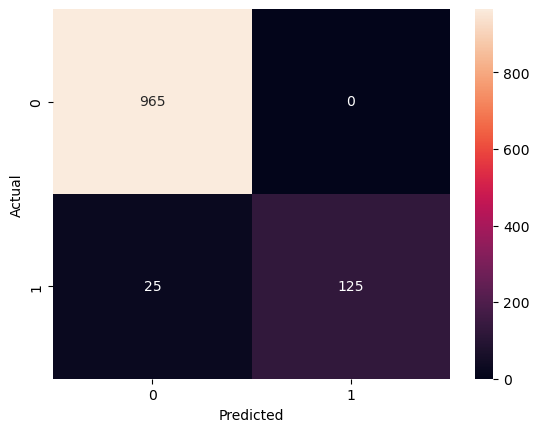

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

##  Testing Model on New Message

In [38]:
sample = "Win cash now! Click the link to claim your free prize"
sample_clean = transform_text(sample)
sample_vector = tfidf.transform([sample_clean])

model.predict(sample_vector)

array([1])

In [39]:
result = model.predict(sample_vector)[0]

if result == 1:
    print("Spam Email")
else:
    print("Not Spam Email")

Spam Email


In [41]:
import pickle

pickle.dump(model, open("model.pkl", "wb"))
pickle.dump(tfidf, open("vectorizer.pkl", "wb"))